In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, Series
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

pd.set_option('display.max_rows', 30000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# 모델링

In [2]:
df_pre = pd.read_csv('data/df_pre.csv')
print(np.shape(df_pre))
df_pre.tail()

(26729, 23)


,Unnamed: 0,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Color_pre,DayuponOutcome,AboutAge,BreedMix,Breed_pre,Year,Month,YearMonth,Season,Quarter,Group,Size
26724,26724,18631,0,14983,4,Partner,0,1,2,640,111,2,30,2,1,80,2,4,19,1,1,8,5
26725,26725,26055,0,22209,4,SCRP,0,3,24,640,104,2,90,2,1,80,3,0,27,3,0,8,5
26726,26726,16731,1,13463,0,NaN,1,2,30,1022,353,22,1460,20,1,147,2,2,17,1,0,12,9
26727,26727,7450,0,5074,4,Partner,0,1,29,640,5,0,28,2,1,80,1,3,6,1,1,8,5
26728,26728,20751,0,16611,4,SCRP,0,1,5,640,111,2,365,2,1,80,2,6,21,2,2,8,5


In [3]:
del df_pre['Unnamed: 0']

In [4]:
print(np.shape(df_pre))
df_pre.tail()

(26729, 22)


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Color_pre,DayuponOutcome,AboutAge,BreedMix,Breed_pre,Year,Month,YearMonth,Season,Quarter,Group,Size
26724,18631,0,14983,4,Partner,0,1,2,640,111,2,30,2,1,80,2,4,19,1,1,8,5
26725,26055,0,22209,4,SCRP,0,3,24,640,104,2,90,2,1,80,3,0,27,3,0,8,5
26726,16731,1,13463,0,NaN,1,2,30,1022,353,22,1460,20,1,147,2,2,17,1,0,12,9
26727,7450,0,5074,4,Partner,0,1,29,640,5,0,28,2,1,80,1,3,6,1,1,8,5
26728,20751,0,16611,4,SCRP,0,1,5,640,111,2,365,2,1,80,2,6,21,2,2,8,5


# Random Forest (전체 feature importances) 

In [11]:
columns = ['Name', 'DateTime','AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color', 'Color_pre', 'DayuponOutcome','AboutAge','BreedMix','Breed_pre','Year','Month','YearMonth','Season','Quarter','Group','Size']
df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


train score: 0.9999532338773792
test score: 0.6339319117096894
log loss: 1.1270379786227118



Feature ranking:
1. feature 3 (0.144489)
2. feature 1 (0.143573)
3. feature 8 (0.099903)
4. feature 6 (0.088492)
5. feature 5 (0.056139)
6. feature 7 (0.054242)
7. feature 14 (0.052604)
8. feature 4 (0.052602)
9. feature 0 (0.050481)
10. feature 13 (0.045377)
11. feature 11 (0.041602)
12. feature 9 (0.033391)
13. feature 17 (0.031248)
14. feature 18 (0.027509)
15. feature 15 (0.021584)
16. feature 16 (0.019772)
17. feature 2 (0.015394)
18. feature 12 (0.014438)
19. feature 10 (0.007160)


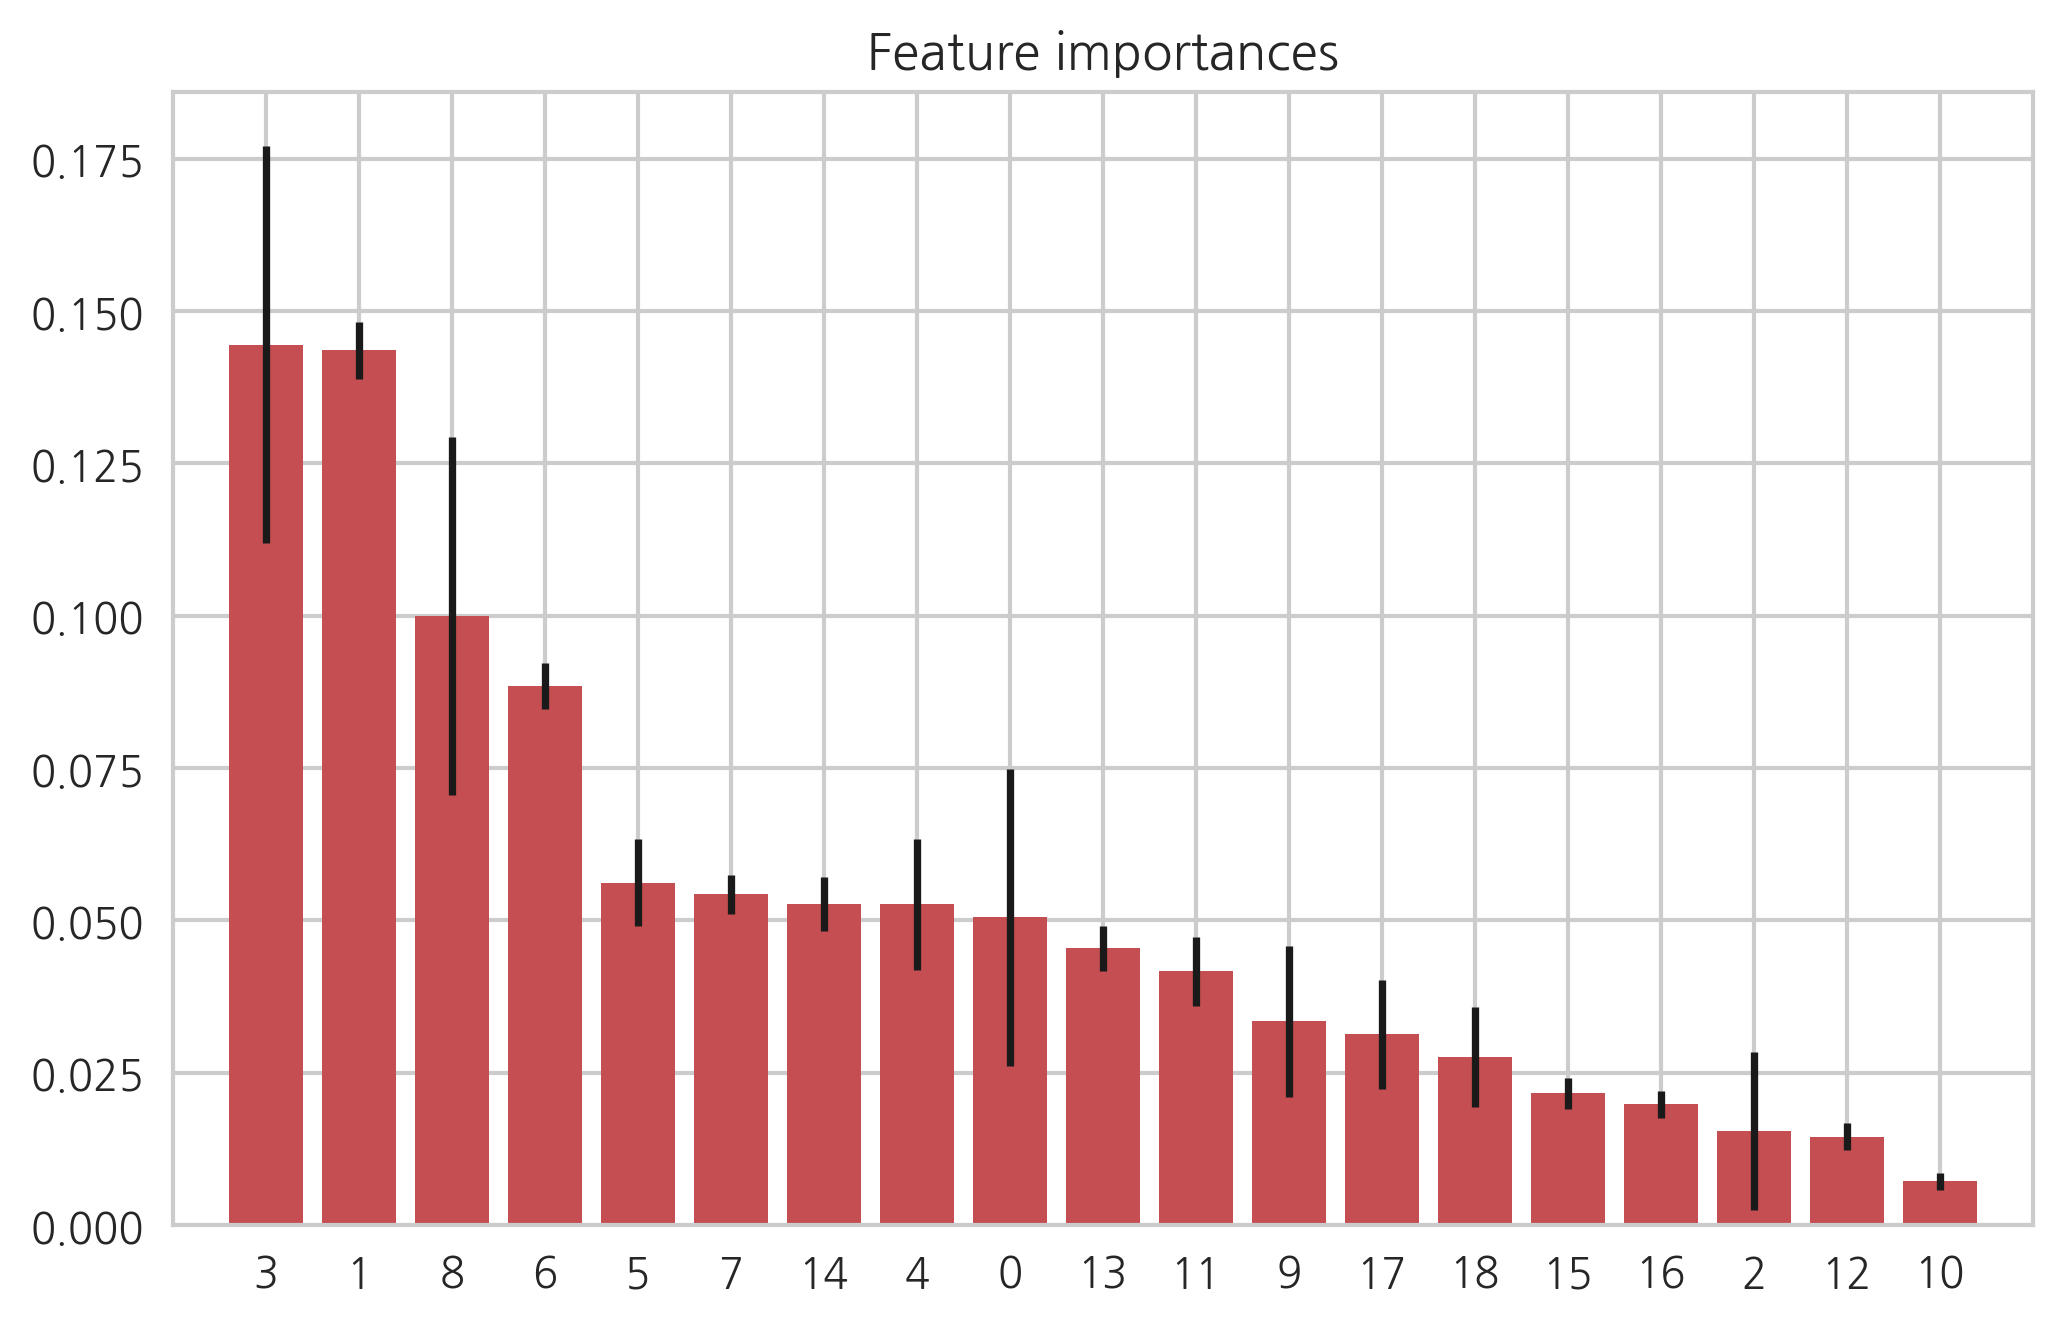

In [13]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

importances = rf.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(df_x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.title("Feature importances")
plt.bar(range(df_x.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(df_x.shape[1]), indices)
plt.xlim([-1, df_x.shape[1]])
plt.show()

# Random Forest 

- 1 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Year'] 

In [54]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Year'] 

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.8011036804938503
test score: 0.5555555555555556
log loss: 1.8783832389364936



- 2 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Month']

In [55]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Month'] 

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.8735911705560492
test score: 0.5589225589225589
log loss: 1.7170981928568472



- 3 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'YearMonth']

In [56]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'YearMonth'] 

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.9155871486695039
test score: 0.5632248410026188
log loss: 1.5379631569883232



- 4 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Season']

In [57]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Season'] 

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.8146658560538745
test score: 0.5538720538720538
log loss: 1.9324877419822



- 5 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Quarter']

In [58]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Quarter'] 

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.8142917270729084
test score: 0.5544332210998878
log loss: 1.987696300439277



- 6 . ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Year']

In [5]:
columns = ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Year']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.7025206940092596
test score: 0.5284324728769173
log loss: 1.969618631399007



- 7 . ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Month']

In [8]:
columns = ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Month']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.7749146518262171
test score: 0.5145903479236813
log loss: 1.9821968064766362



- 8 . ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'YearMonth']

In [7]:
columns = ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'YearMonth']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.8252817658887902
test score: 0.5216984661429106
log loss: 1.9294567976580403



- 9 . ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Season']

In [9]:
columns = ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Season']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.7130898377215545
test score: 0.5198279087167976
log loss: 1.9335018433205342



- 10 . ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Quarter']

In [10]:
columns = ['Name', 'Color_pre', 'AboutAge', 'BreedMix', 'Breed_pre', 'Quarter']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.7138380956834869
test score: 0.5200149644594089
log loss: 1.9571902704406532



- 11 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Year', 'Group']

In [11]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Year', 'Group']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.8011036804938503
test score: 0.5591096146651702
log loss: 1.906976682291443



- 12 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Month', 'Group']

In [12]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'Month', 'Group']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.8735911705560492
test score: 0.5679012345679012
log loss: 1.7606278281994434



- 13 . ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'YearMonth', 'Group']

In [13]:
columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'YearMonth', 'Group']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

rf = RandomForestClassifier(n_estimators=300, random_state=0)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)

print('train score: {}'.format(rf.score(X_train, y_train)))
print('test score: {}'.format(rf.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, rf_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


train score: 0.9155871486695039
test score: 0.5714552936775159
log loss: 1.5198682544580564



# Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

columns = ['Name', 'Color_pre', 'DayuponOutcome', 'BreedMix', 'Breed_pre', 'YearMonth', 'Group']

df_x = df_pre[columns]
df_y = df_pre.iloc[:, [3]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=True)

model = LogisticRegression().fit(X_train, y_train)
model_probs = model.predict_proba(X_test)

print('train score: {}'.format(model.score(X_train, y_train)))
print('test score: {}'.format(model.score(X_test, y_test)))
print('log loss: {}'.format(log_loss(y_test, model_probs)))
print()

/home/dockeruser/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


train score: 0.54594771547491
test score: 0.5443322109988776
log loss: 1.0671751149468862

